In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pymsm.utils import stepfunc

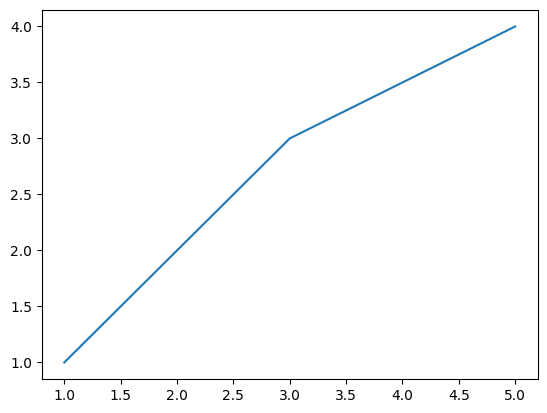

In [27]:
xs = [1,2,3,5]
ys = [1,2,3,4]

plt.plot(xs, ys)

In [28]:
stepfunc(xs,ys)

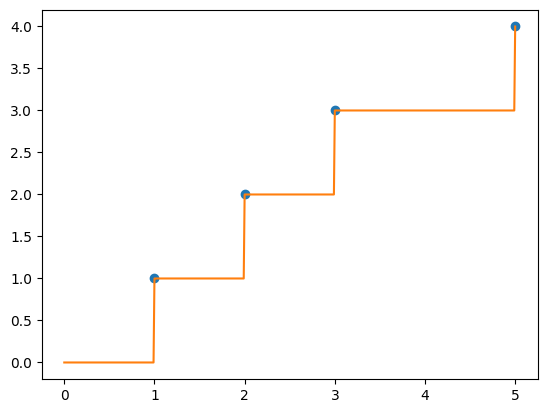

In [29]:
xnew = np.arange(0, 6, 0.01)
ynew = stepfunc(xs, ys)(xnew)
plt.plot(xs, ys, 'o', xnew, ynew, '-')

In [31]:
ynew[np.where(xnew==1.0)[0]]

array([1.])

In [32]:
xs = [1,2,3,5]
ys = [1,2,3,4]

xnew = np.arange(0, 6, 0.01)
ynew = stepfunc(xs, ys)(xnew)


np.testing.assert_equal(ynew[np.where(xnew==0.5)[0]],0)
np.testing.assert_equal(ynew[np.where(xnew==1.0)[0]],1)

np.testing.assert_equal(ynew[np.where(xnew==1.5)[0]],1)
np.testing.assert_equal(ynew[np.where(xnew==2.0)[0]],2)

np.testing.assert_equal(ynew[np.where(xnew==2.5)[0]],2)
np.testing.assert_equal(ynew[np.where(xnew==3.0)[0]],3)

np.testing.assert_equal(ynew[np.where(xnew==3.5)[0]],3)
np.testing.assert_equal(ynew[np.where(xnew==4.0)[0]],3)
np.testing.assert_equal(ynew[np.where(xnew==5.0)[0]],4)


In [34]:
from pymsm.datasets import prep_rotterdam

dataset, states_labels = prep_rotterdam()
# Init MultistateModel
from pymsm.multi_state_competing_risks_model import MultiStateModel

multi_state_model = MultiStateModel(
    dataset,
    terminal_states=[3],
    state_labels={1: "Primary surgery", 2: "Disease recurrence", 3: "Death"},
)
# Plot state diagram
multi_state_model.plot_state_diagram()

# Fit to data
multi_state_model.fit()

# Run Monte-carlo simulation
all_mcs = multi_state_model.run_monte_carlo_simulation(
    sample_covariates=dataset[0].covariates.values,
    origin_state=1,
    current_time=0,
    max_transitions=2,
    n_random_samples=3,
    print_paths=True,
    n_jobs=None,
)

Fitting Model at State: 1
>>> Fitting Transition to State: 3, n events: 195
>>> Fitting Transition to State: 2, n events: 1518
Fitting Model at State: 2
>>> Fitting Transition to State: 3, n events: 1077


100%|██████████| 3/3 [00:00<00:00, 49.29it/s]

States: [1, 2, 3]
Transition times: [415.999989, 2307.0000648779983]


States: [1, 2, 3]
Transition times: [5310.000127, 674.999957]


States: [1, 2, 3]
Transition times: [1721.99996, 1773.00005]




In [37]:
p = all_mcs[0]

In [39]:
p.states

[1, 2, 3]

In [41]:
assert len(all_mcs)==3

In [ ]:
assert all_mcs[0]